
# Item based collaborative filtering python

In [2]:
#importing neccesary packages
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1 - Data Preparation

In [17]:
ratings=pd.read_csv('ratings1.csv',sep=';')
produk=pd.read_csv('bodycares.csv',sep=';', na_values=['?'])

In [18]:
skripsi=pd.merge(ratings,produk,on='itemId',how='inner')

In [19]:
skripsi.shape

(9495, 5)

In [20]:
skripsi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9495 entries, 0 to 9494
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userId    9495 non-null   int64  
 1   itemId    9495 non-null   int64  
 2   rating    9495 non-null   float64
 3   Item      9495 non-null   object 
 4   Kategori  9495 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 445.1+ KB


In [21]:
skripsi.head()

userId  itemId  rating                        Item   Kategori
0       1       3     5.0  BIORE-Experience Body Foam  Body Wash
1      18       3     4.3  BIORE-Experience Body Foam  Body Wash
2      39       3     4.3  BIORE-Experience Body Foam  Body Wash
3      47       3     4.0  BIORE-Experience Body Foam  Body Wash
4      54       3     5.0  BIORE-Experience Body Foam  Body Wash

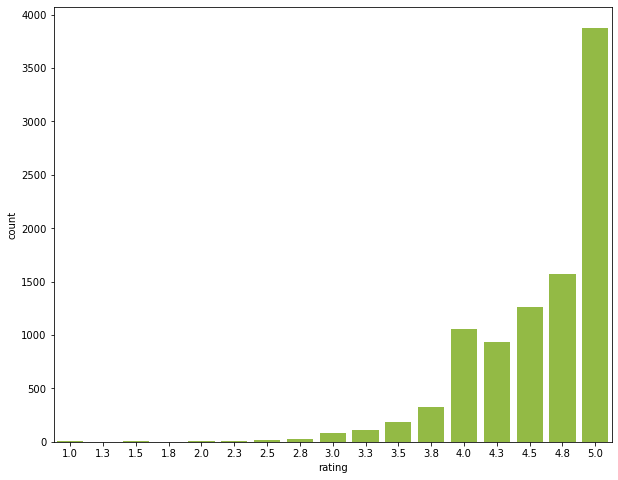

In [22]:
# Jadikan sebagai variabel dan lakukan perhitungan sejumlah nilai yang ada di kolom Rating 
rating = skripsi['rating'].value_counts()
rating

# Visualisasikan dari hasil perhitungan nilai
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x="rating", color='yellowgreen',data=skripsi)

In [23]:
from scipy.sparse import csr_matrix 

In [24]:
missing_pivot=skripsi.pivot_table(values='rating', index='userId', columns='Item')

In [27]:
missing_pivot=missing_pivot.fillna('?')
missing_pivot

Item   AVEENO-Daily Moisturizing Lotion  \
userId                                    
1                                     ?   
2                                     ?   
3                                     ?   
4                                     ?   
5                                     ?   
...                                 ...   
6279                                  ?   
6280                                  ?   
6281                                  ?   
6282                                  ?   
6283                                  ?   

Item   AZARINE-Body C Scrub 2 IN 1 Scrub & Mask C White  \
userId                                                    
1                                                     ?   
2                                                     ?   
3                                                     ?   
4                                                     ?   
5                                                     ?   
...                                                 ...   
6279                                                  ?   
6280                                                  ?   
6281                                                  ?   
6282                                                  ?   
6283                                                  ?   

Item   AZARINE-Lightening ToneUp Body Serum C White  \
userId                                                
1                                                 ?   
2                                                 ?   
3                                                 ?   
4                                                 ?   
5                                                 ?   
...                                             ...   
6279                                              ?   
6280                                              ?   
6281                                              ?   
6282                                              ?   
6283                                              ?   

Item   BANANA BOAT-Sport SPF 50-Travel Size  \
userId                                        
1                                         ?   
2                                         ?   
3                                         ?   
4                                         ?   
5                                         ?   
...                                     ...   
6279                                      ?   
6280                                      ?   
6281                                      ?   
6282                                      ?   
6283                                      ?   

Item   BANANA BOAT-Sport Sunscreen Lotion SPF 110  \
userId                                              
1                                             4.5   
2                                               ?   
3                                               ?   
4                                               ?   
5                                               ?   
...                                           ...   
6279                                            ?   
6280                                            ?   
6281                                            ?   
6282                                            ?   
6283                                            ?   

Item   BANANA BOAT-Sport Sunscreen Lotion SPF 30 - 90ml  \
userId                                                    
1                                                     ?   
2                                                     ?   
3                                                     ?   
4                                                     ?   
5                                                     ?   
...                                                 ...   
6279                                                  ?   
6280                                                  ?   
6281                                                  ?   
6282 

In [28]:
rate={}
rows_indexes={}
for i, row in missing_pivot.iterrows():
    rows=[x for x in range(0,len(missing_pivot.columns))]
    combine=list(zip(row.index,row.values,rows))
    rated=[(x,z) for x,y,z in combine if str(y) !='nan']
    index=[i[1] for i in rated]
    row_names=[i[0] for i in rated]
    rows_indexes[i]=index
    rate[i]=row_names

In [29]:
rate

{1: ['AVEENO-Daily Moisturizing Lotion',
  'AZARINE-Body C Scrub 2 IN 1 Scrub & Mask C White',
  'AZARINE-Lightening ToneUp Body Serum C White',
  'BANANA BOAT-Sport SPF 50-Travel Size',
  'BANANA BOAT-Sport Sunscreen Lotion SPF 110',
  'BANANA BOAT-Sport Sunscreen Lotion SPF 30 - 90ml',
  'BANANA BOAT-Sport Sunscreen Lotion SPF 50 - 90ml',
  'BANANA BOAT-Sun Comfort Lotion SPF 50',
  'BANANA BOAT-Ultra Protect Sunscreen Lotion SPF 30',
  'BANANA BOAT-Ultra Protect Sunscreen Lotion SPF 50',
  'BANANA BOAT-Ultra Protect Sunscreen Lotion SPF 80 - 90ml',
  'BANANA BOAT-Ultra Protect Ultramist SPF50',
  'BANANA BOAT-Ultraprotect SPF 50-Travel Size',
  'BIORE-Beauty Body Foam Pouch',
  'BIORE-Body Foam Pouch',
  'BIORE-Experience Body Foam',
  'C LAB & CO-Coffee & Coconut Scrub Travel Size BAG',
  'C LAB & CO-Coffee Scrub Travel Size BAG',
  'DOVE-Deeply Nourishing Body Wash',
  'DR BRONNERS-Pure Castile Bar Soap',
  'DR BRONNERS-Pure Castile Liquid Soap',
  'Dew It On The Go - Sunscreen Mi

Here's the user-matrix

In [30]:
pivot_table=skripsi.pivot_table(values='rating',index='userId',columns='Item').fillna(0)

In [31]:
pivot_table=pivot_table.apply(np.sign)

In [14]:
?np.sign

In [32]:
pivot_table.head(12)

Item    AVEENO-Daily Moisturizing Lotion  \
userId                                     
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
5                                    0.0   
6                                    0.0   
7                                    0.0   
8                                    0.0   
9                                    0.0   
10                                   0.0   
11                                   0.0   
12                                   0.0   

Item    AZARINE-Body C Scrub 2 IN 1 Scrub & Mask C White  \
userId                                                     
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
5                                                    0.0   
6                                                    0.0   
7                                                    0.0   
8                                                    0.0   
9                                                    0.0   
10                                                   0.0   
11                                                   0.0   
12                                                   0.0   

Item    AZARINE-Lightening ToneUp Body Serum C White  \
userId                                                 
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
5                                                0.0   
6                                                0.0   
7                                                0.0   
8                                                0.0   
9                                                0.0   
10                                               0.0   
11                                               0.0   
12                                               0.0   

Item    BANANA BOAT-Sport SPF 50-Travel Size  \
userId                                         
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
5                                        0.0   
6                                        0.0   
7                                        0.0   
8                                        0.0   
9                                        0.0   
10                                       0.0   
11                                       0.0   
12                                       0.0   

Item    BANANA BOAT-Sport Sunscreen Lotion SPF 110  \
userId                                               
1                                              1.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
5                                              0.0   
6                                              0.0   
7                                              0.0   
8                                              0.0   
9                                              0.0   
10                                             0.0   
11                                             0.0   
12                                             0.0   

Item    BANANA BOAT-Sport Sunscreen Lotion SPF 30 - 90ml  \
userId                                                     
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                          

bodycare not rate by users

In [33]:
notrated={}
notrated_indexes={}
for i, row in pivot_table.iterrows():
    rows=[x for x in range(0,len(missing_pivot.columns))]
    combine=list(zip(row.index,row.values,row))
    idx_row=[(idx,col) for idx, val, col in combine if not val > 0]
    indices=[i[1] for i in idx_row]
    row_names=[i[0] for i in idx_row]
    notrated_indexes[i]=indices
    notrated[i]=row_names

In [34]:
notrated

{1: ['AVEENO-Daily Moisturizing Lotion',
  'AZARINE-Body C Scrub 2 IN 1 Scrub & Mask C White',
  'AZARINE-Lightening ToneUp Body Serum C White',
  'BANANA BOAT-Sport SPF 50-Travel Size',
  'BANANA BOAT-Sport Sunscreen Lotion SPF 30 - 90ml',
  'BANANA BOAT-Sport Sunscreen Lotion SPF 50 - 90ml',
  'BANANA BOAT-Sun Comfort Lotion SPF 50',
  'BANANA BOAT-Ultra Protect Sunscreen Lotion SPF 30',
  'BANANA BOAT-Ultra Protect Sunscreen Lotion SPF 50',
  'BANANA BOAT-Ultra Protect Sunscreen Lotion SPF 80 - 90ml',
  'BANANA BOAT-Ultra Protect Ultramist SPF50',
  'BANANA BOAT-Ultraprotect SPF 50-Travel Size',
  'BIORE-Beauty Body Foam Pouch',
  'BIORE-Body Foam Pouch',
  'C LAB & CO-Coffee & Coconut Scrub Travel Size BAG',
  'C LAB & CO-Coffee Scrub Travel Size BAG',
  'DOVE-Deeply Nourishing Body Wash',
  'DR BRONNERS-Pure Castile Bar Soap',
  'DR BRONNERS-Pure Castile Liquid Soap',
  'Dew It On The Go - Sunscreen Mist',
  'ELSHESKIN-Milk Body Scrub',
  'EMINA-Body Scrub Kiwi',
  'EMINA-Body Scr

# Unsupervised Nearest Neighbor Recommender

In [35]:
n=5
cosine_nn=NearestNeighbors(n_neighbors=n, algorithm='brute', metric='cosine')
item_cosine_nn_fit=cosine_nn.fit(pivot_table.T.values)
item_cosine_nn_fit
item_distances,item_indices=item_cosine_nn_fit.kneighbors(pivot_table.T.values)

In [36]:
print(item_distances)

[[0.00000000e+00 9.40000000e-01 9.60000000e-01 9.66666667e-01
  9.66666667e-01]
 [4.44089210e-16 9.56966852e-01 9.66666667e-01 9.66666667e-01
  9.72222222e-01]
 [1.55431223e-15 9.56966852e-01 9.56966852e-01 9.56966852e-01
  9.65573481e-01]
 [1.88737914e-15 7.02225000e-01 9.23147944e-01 9.53209173e-01
  9.58714592e-01]
 [0.00000000e+00 8.00000000e-02 9.73333333e-01 9.79932998e-01
  9.86666667e-01]
 [4.44089210e-16 9.43050520e-01 9.52542100e-01 9.56826711e-01
  9.70708348e-01]
 [0.00000000e+00 8.80000000e-01 9.43050520e-01 9.60000000e-01
  9.60000000e-01]
 [0.00000000e+00 9.23147944e-01 9.62645632e-01 9.64781964e-01
  9.71681726e-01]
 [5.55111512e-16 9.53209173e-01 9.54514117e-01 9.56826711e-01
  9.69676078e-01]
 [1.33226763e-15 9.64781964e-01 9.70904281e-01 9.71715729e-01
  9.71715729e-01]
 [0.00000000e+00 8.80000000e-01 9.33333333e-01 9.46666667e-01
  9.52542100e-01]
 [0.00000000e+00 8.00000000e-02 9.79932998e-01 9.80000000e-01
  9.80000000e-01]
 [0.00000000e+00 7.02225000e-01 9.677288

In [37]:
print(item_indices)

[[ 0 33 32 26 74]
 [ 1  2 14 68 35]
 [ 2 48  1 35 56]
 [ 3 12  7  8 15]
 [ 4 11 67 62 54]
 [ 5  6 10  8  3]
 [ 6 10  5 73 69]
 [ 7  3 10  9  8]
 [ 8  3 10  5  6]
 [ 9  7  3 10  6]
 [10  6 73 69  5]
 [11  4 62 63 52]
 [12  3 15 14 10]
 [13 14 37 15 62]
 [14 13 15 37 30]
 [15 14 13 66  3]
 [16 48 52 63 17]
 [17 20  2 16 54]
 [18 13 66 35 14]
 [19 33 32 30 15]
 [20 17 57 15 30]
 [21 27 62 33 59]
 [22 34 48  0 32]
 [23 24 73 69 72]
 [24 23 73 72 69]
 [25 18 66  0 42]
 [26 62 13 37 14]
 [27 21 15 65 67]
 [28 52 66 68 56]
 [29 30 64 39 62]
 [30 29 31 43 32]
 [31 30 32 33 18]
 [32 19 33 31 30]
 [33 19 32  0 31]
 [34 35 18 30 22]
 [35 34 66 18 30]
 [36 37 38 64 39]
 [37 13 41 64 14]
 [38 39 63 37 18]
 [39 44 38 43 30]
 [40 41 37 43 42]
 [41 37 44 40 43]
 [42 43 41 40 31]
 [43 42 30 39 41]
 [44 39 41 43 13]
 [45 26 30 65 31]
 [46 72 24 42 61]
 [47 15 27 30 66]
 [48  2 16 56 37]
 [49 50 54 53 51]
 [50 49 54 51 56]
 [51 53 49 54 50]
 [52 56 55 54 49]
 [53 49 51 56 55]
 [54 56 50 49 51]
 [55 56 53

###### item-Based Recommender

In [21]:
items_dic={}
for i in range(len(pivot_table.T.index)):
    item_idx=item_indices[i]
    col_names=pivot_table.T.index[item_idx].tolist()
    items_dic[pivot_table.T.index[i]]=col_names

In [22]:
items_dic

{'AVEENO-Daily Moisturizing Lotion': ['AVEENO-Daily Moisturizing Lotion',
  "MUTOUCH-Goat's Milk Shower Cream English Lavender and Rosemary",
  'LOVE BEAUTY AND PLANET-Tropical Refresh Coconut Oil & Ylang Ylang Body Wash',
  'HERBORIST-Lulur Tradisional Bali',
  'WHITELAB-Brightening Body Serum'],
 'AZARINE-Body C Scrub 2 IN 1 Scrub & Mask C White': ['AZARINE-Body C Scrub 2 IN 1 Scrub & Mask C White',
  'AZARINE-Lightening ToneUp Body Serum C White',
  'BIORE-Body Foam Pouch',
  'VASELINE-Superfood Skin Serum Cranberry',
  'MUTOUCH-Whitening Body Serum Revitalizing Spray'],
 'AZARINE-Lightening ToneUp Body Serum C White': ['AZARINE-Lightening ToneUp Body Serum C White',
  'SUGARPOT-Wonder Serum',
  'AZARINE-Body C Scrub 2 IN 1 Scrub & Mask C White',
  'MUTOUCH-Whitening Body Serum Revitalizing Spray',
  'Scarlett Whitening Shower Scrub- Mango'],
 'BANANA BOAT-Sport SPF 50-Travel Size': ['BANANA BOAT-Sport SPF 50-Travel Size',
  'BANANA BOAT-Ultraprotect SPF 50-Travel Size',
  'BANANA B

In [23]:
topRecs = {}
for k,v in rows_indexes.items():  
    item_idx= [j for i in item_indices[v] for j in i]
    item_dist= [j for i in item_distances[v] for j in i]
    combine=list(zip(item_dist,item_idx))
    diction={i:d for d,i in combine if i not in v}
    zipped=list(zip(diction.keys(),diction.values()))
    sort=sorted(zipped, key=lambda x: x[1])
    recommendations=[(pivot_table.columns[i],d)for i,d in sort]
    topRecs[k]=recommendations 

In [24]:
def getrecommendations(userId,number_of_recs=5):
    if userId > len(pivot_table.index):
        print('Out of range, there are only {} users, try again!'.format(len(pivot_table.index)))
    else:
        print("These are all the product of bodycare you have viewed in the past: \n\n{}".format('\n'.join(rate[userId])))
        print()
        print("We recommend to view these the product too:\n")
    for k,v in topRecs.items():
        if userId == k:
            for i in v[:number_of_recs]:
                print('{} with similarity: {:.4f}'.format(i[0], 1-i[1]))

# the top recommendation

In [25]:
getrecommendations(10)

These are all the product of bodycare you have viewed in the past: 

BIORE-Beauty Body Foam Pouch
NIVEA-Body Intensive Lotion
VASELINE-Healthy Bright Vitamin Body Serum Soft Glow

We recommend to view these the product too:

VASELINE-Healthy Bright Vitamin Body Serum Firm Glow with similarity: 0.1200
VASELINE-Healthy Bright Vitamin Gel Serum Fresh Glow with similarity: 0.1200
BIORE-Experience Body Foam with similarity: 0.1137
VASELINE-Healthy Bright Body Lotion UV Lightening with similarity: 0.0870
BIORE-Body Foam Pouch with similarity: 0.0669


# These recomendations make sense to me!

# Predict a Rating for an Item by an User

In [26]:
#Rumus Distances=1-SimilarityCosine(A,B)
similarity=1-item_distances
similarity=pd.DataFrame(similarity)
similarity

0         1         2         3         4
0   1.0  0.060000  0.040000  0.033333  0.033333
1   1.0  0.043033  0.033333  0.033333  0.027778
2   1.0  0.043033  0.043033  0.043033  0.034427
3   1.0  0.297775  0.076852  0.046791  0.041285
4   1.0  0.920000  0.026667  0.020067  0.013333
..  ...       ...       ...       ...       ...
70  1.0  0.046667  0.033333  0.033333  0.033333
71  1.0  0.040134  0.040000  0.033333  0.026667
72  1.0  0.166667  0.120000  0.060000  0.046667
73  1.0  0.240000  0.166667  0.126667  0.080000
74  1.0  0.040000  0.033333  0.026667  0.026667

[75 rows x 5 columns]

In [27]:
ratingasli=missing_pivot.fillna(0)
ratingasli

Item    AVEENO-Daily Moisturizing Lotion  \
userId                                     
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
5                                    0.0   
...                                  ...   
6279                                 0.0   
6280                                 0.0   
6281                                 0.0   
6282                                 0.0   
6283                                 0.0   

Item    AZARINE-Body C Scrub 2 IN 1 Scrub & Mask C White  \
userId                                                     
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
5                                                    0.0   
...                                                  ...   
6279                                                 0.0   
6280                                                 0.0   
6281                                                 0.0   
6282                                                 0.0   
6283                                                 0.0   

Item    AZARINE-Lightening ToneUp Body Serum C White  \
userId                                                 
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
5                                                0.0   
...                                              ...   
6279                                             0.0   
6280                                             0.0   
6281                                             0.0   
6282                                             0.0   
6283                                             0.0   

Item    BANANA BOAT-Sport SPF 50-Travel Size  \
userId                                         
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
5                                        0.0   
...                                      ...   
6279                                     0.0   
6280                                     0.0   
6281                                     0.0   
6282                                     0.0   
6283                                     0.0   

Item    BANANA BOAT-Sport Sunscreen Lotion SPF 110  \
userId                                               
1                                              4.5   
2                                              0.0   
3                                              0.0   
4                                              0.0   
5                                              0.0   
...                                            ...   
6279                                           0.0   
6280                                           0.0   
6281                                           0.0   
6282                                           0.0   
6283                                           0.0   

Item    BANANA BOAT-Sport Sunscreen Lotion SPF 30 - 90ml  \
userId                                                     
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
5                                                    0.0   
...                                                  ...   
6279                                                 0.0   
6280                                             

In [28]:
# Rate prediction with name representation

def rate_predict(user_id: int, item_name: str, indices: np.array, distances: np.array, ratings: pd.DataFrame):
    user = ratings.index.tolist()
    user_id = user.index(user_id)

    items = ratings.columns.tolist()
    item_id = items.index(item_name)

    indices = indices[:, 1:] # remove the item itself
    distances = distances[:, 1:] # remove the item itself 

    ratings = ratings.values # convert to metrices
    nearest_item = indices[item_id]
    rsj = [] # get rate times similarity
    sj = [] # get tje sj
    for i, j in enumerate(nearest_item):
        sj.append((1-distances[item_id, i]))
        rsj.append(ratings[user_id, j]*(1-distances[item_id, i]))
    
    return sum(rsj)/sum(sj)

In [29]:
rate_predict(6283, "VASELINE-Healthy Bright Body Lotion Night Repair", item_indices, item_distances, ratingasli)

1.3943711288760314

# Evaluating the recommender's predictions

Untuk melakukan ini berikut diberikan 2 fungsi, yaitu rate_predict_with_index dan get_prediction . Fungsi rate_predict_with_index merupakan modifikasi dari fungsi rate_predict di bagian sebelumnya dimana secara fungsional digunakan untuk mempermudah generating nilai prediksi rating yang dilakukan user terhadap suatu item. Adapun fugnsi get_prediction digunakan untuk mencari matriks prediction yang nantinya akan dikomparasikan dengan data trainingnya yaitu data rating (ratingasli).

In [30]:
# Rate prediction with index representation

def rate_predict_with_index(user_id: int, item_id: str, indices: np.array, distances: np.array, ratings: np.array):

    indices = indices[:, 1:] # remove the item itself
    distances = distances[:, 1:] # remove the item itself 
    
    nearest_item = indices[item_id]
    rsj = [] # get rate times similarity
    sj = [] # get tje sj
    for i, j in enumerate(nearest_item):
        sj.append((1-distances[item_id, i]))
        rsj.append(ratings[user_id, j]*(1-distances[item_id, i]))
    
    return sum(rsj)/sum(sj)

In [31]:
def get_prediction(indices: np.array, distances: np.array, ratings: np.array):
    data = []
    user, item = ratings.shape
    for i in range(user):
        temp = []
        for j in range(item):
            temp.append(rate_predict_with_index(i, j, indices, distances, ratings))
        
        data.append(temp)
    
    return np.array(data)

In [32]:
prediction = get_prediction(item_indices, item_distances, ratingasli.values)

In [58]:
def rmse(prediction,ratingasli):
    return sqrt (mean_squared_error(prediction,ratingasli))

In [59]:
error_rate=rmse(prediction,ratingasli.values)
print("Accuracy: {:.3f}".format(100-error_rate))
print("RMSE: {:.5f}".format(error_rate))

Accuracy: 99.308
RMSE: 0.69193
